<div style="display: flex; align-items: center;" ><h1>Rapport modelisation et simulation </h1></div>
<p> Realiser par<br> <b>Tami Abdel-hakim  <br> 

<br>

### Simulation par les lois de probabilité de la bibliothèque SciPy



### Énoncé:

Soit une station d'essence qui décide de faire une étude sur son marcher afin de voire quel service est le plus demandé, le temps d'attente moyen des clients, le nombre de clients arrivée par jour etc .

pour cela la station de service a récolté les coordonné de son activité pendant une durée de 24h et nous à donner cela dans un data frame contenant les données suivantes :

"arrivee": minute d'arrivée de la voiture, "service": le service demandé par la voiture, "duree": la durée de service en minutes pour chaque voiture qui s'alimentent en carburant (essence ou gasoil), dans ce cas le volume du carburant remplit = durée du service (en minutes) x 5litres.



Notre objectif est de simuler le chiffre d'affaires de chaque service et le chiffre d'affaires totales d'une durée de 30 jours


Sachant que les prix des services sont:

<ol>
<li>Essence 45da/litre</li>
<li>Gasoil 29da/litre</li>
<li>lavage 600da/voiture</li>
<li>vidange 2000da/voiture</li>
</ol>



Note:les donees récolter sont dans le fichier station.xlsx




### solution



In [2]:
import pandas as pd
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 

###chargement de toute les bibliotheque nécessaire 

In [3]:
data = pd.read_excel("station.xlsx", index_col=0) 
###chargement du dataset 
data['remplissage'] = data["duree"]*5
#Création d'une nouvelle column remplissage qui représente
#le volume du carburant remplit 

<p>Après avoir chargé notre dataset, la prochaine étape est de faire une analyse approfondie sur chacune colon pour savoir quel type de données on manipule </p>


In [4]:
print(data.info())

mean_duration = data['duree'].mean() ##la duree moyenne de traitement
mean_arriver=data["arrivee"].value_counts().mean() ## la moyenne d'arriver des client en 24h

print("\nla duree moyenne de traitement est de : %.2f min"%(mean_duration))
print("\na moyenne d'arriver des client en 24h est de : %.2f"%(mean_arriver))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2948
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   arrivee      2949 non-null   int64  
 1   service      2949 non-null   object 
 2   duree        2212 non-null   float64
 3   remplissage  2212 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 115.2+ KB
None

la duree moyenne de traitement est de : 2.08 min

a moyenne d'arriver des client en 24h est de : 2.36


<p>maintenant qu'on connaît les types de données qu'on manipule on va passer à la visualisation pour avoir une idée plus claire de ce qu'on a</p>




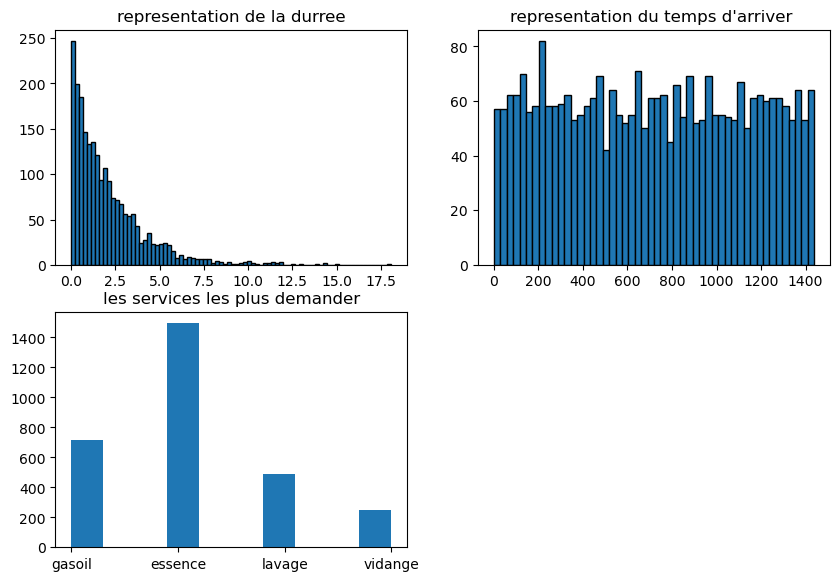

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.hist(data['duree'],bins=80,ec='black')
plt.title('representation de la durree')
plt.subplot(3,2,2)
plt.hist(data['arrivee'],bins=50,ec='black')
plt.title("representation du temps d'arriver ")
plt.subplot(3,2,3)
plt.hist(data['service'])
plt.title("les services les plus demander")
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)



plt.show()

<p>Maintenant qu'on a visualisé nos données on en tire 3 choses importantes la durée suit une <b>distribution exponentielle</b>,<b> l'essence</b> est le service le plus demander à la station,et pour finir l'arrivée des clients peut être généré par une loi de poisson</p>



#### notre objectif maintenant est de faire une simulation de 30 jours pour cela on va s prendre comme suit :
<p>Premièrement définir nos fonctions <b>simulation_poisson</b> et <b>simulation_exp</b>qui vont nous permettre de générer de novelle donees gras aux lois de probabilité</p>


In [7]:
##simulation par loi Exponotielle
def simulation_exp(n,mean): ### cette fonction prend deux parametre n= nombre de donnee quon veut generer et mean c'est la moyenne 
    model=sp.stats.expon(0,mean) 
    simulation=model.rvs(n)
    return simulation ## et retourne une liste de donnees simulé 

##simulation par loi de poisson 
def simulation_poisson(mean,duree):##cette fonction nous génère des données suivant la loi de
    model_poisson =sp.stats.poisson(mean)       #poisson mais pas que elle renvoi une liste d'arriver des client a l'instant i 
    simulation_arriver=model_poisson.rvs(duree) ## 1440min = 24h 
    simulation_heure=[]
    for i in range (duree):
        for j in range(simulation_arriver[i]):
            simulation_heure.append(i)

    return simulation_heure


<p>En suite on va calculer les probabilite des services pour quon genere nos donnees grace a la bib numpy </p>

In [8]:
t=len(data['service']) ##nbr de service totale 
prob_ess= data.service[data['service']=='essence'].count()/t
prob_gasoil= data.service[data['service']=='gasoil'].count()/t
prob_lavage= data.service[data['service']=='lavage'].count()/t
prob_vidange= data.service[data['service']=='vidange'].count()/t
print(' proba essence: ',prob_ess,'\n probas gasoil : ',prob_gasoil, '\n proba lavage: ',prob_lavage,'\n proba vidange: ',prob_vidange)

 proba essence:  0.506951508986097 
 probas gasoil :  0.24313326551373346 
 proba lavage:  0.16480162767039674 
 proba vidange:  0.0851135978297728


<p>On va creer notre nouvelle dataset avec nos nouvelles données qui vont être simulé par les fonctions que nous avons implementer auparavant   </p>

In [9]:
### creation du dataFrame  pour les donnee simuler 
simulated_data=pd.DataFrame(data=None,columns=['arrivee','duree','service',"jour"])

## simuler pour 30j 
for i in range (30):
    df=pd.DataFrame(columns=['arrivee','duree','service',"jour"])
    df['arrivee']=simulation_poisson(mean_arriver,1440)##genere les donnees d'arriver avec la loi de poisson 
    df['duree']=simulation_exp(len(df['arrivee']),mean_duration)#genere les donnees de duree avec la loi exponetielle 
    df['service']=np.random.choice(['essence','gasoil','lavage',"vidange"],len(df['arrivee']),p=[prob_ess,prob_gasoil,prob_lavage,prob_vidange]) ###genere les donnees des different service
    df['jour']=np.full((len(df['arrivee']),1),i+1)
    simulated_data= pd.concat([df,simulated_data])##concatenation de notre dataframe pour obtenir 30j a la fin 


    

<p>On va expliquer brièvement ce que le bloc précédent fait comme traitement<br>on a créé notre data Frame qui va contenir nos données simulées pour 30j d'où l'interner de la boucle de range 30 >dans le corps de la boucle on va créer un data frame pour manipuler en local qu'en global ont introduit nos données dans le data frame en utilisant nos fonctions qui nous renvoient des listes de données simuler à la fin on va concaténer notre data frame local avec notre dataframe globale qui est vide a chaque iterration </p>

In [10]:
print(simulated_data.head(20))

   arrivee     duree  service jour
0        0  2.327259  essence   30
1        0  3.643751   gasoil   30
2        1  0.687119  essence   30
3        1  0.433965  essence   30
4        1  1.391190   lavage   30
5        2  1.861126  essence   30
6        3  1.894591  vidange   30
7        3  0.353740  essence   30
8        4  4.463471   lavage   30
9        4  0.356659  essence   30
10       4  0.463333   lavage   30
11       4  0.203862  essence   30
12       5  0.692447  essence   30
13       5  2.220352   gasoil   30
14       5  2.442969   gasoil   30
15       5  0.329544   lavage   30
16       6  3.265908   lavage   30
17       6  0.062425  essence   30
18       6  2.093950   lavage   30
19       7  4.286693  essence   30


Maintenant qu'on a généré notre data frame de 30 on remarque qu'il ne ressemble pas au premier dataset donc on va importer quelques modifications  


on va commencer à modifier la durée des different services qui n'ont pas de durree en remplaçant leur leur par Nan

In [11]:
simulated_data.loc[simulated_data['service']=='lavage','duree']=np.nan
simulated_data.loc[simulated_data['service']=='vidange','duree']= np.nan
print(simulated_data.head(20))

   arrivee     duree  service jour
0        0  2.327259  essence   30
1        0  3.643751   gasoil   30
2        1  0.687119  essence   30
3        1  0.433965  essence   30
4        1       NaN   lavage   30
5        2  1.861126  essence   30
6        3       NaN  vidange   30
7        3  0.353740  essence   30
8        4       NaN   lavage   30
9        4  0.356659  essence   30
10       4       NaN   lavage   30
11       4  0.203862  essence   30
12       5  0.692447  essence   30
13       5  2.220352   gasoil   30
14       5  2.442969   gasoil   30
15       5       NaN   lavage   30
16       6       NaN   lavage   30
17       6  0.062425  essence   30
18       6       NaN   lavage   30
19       7  4.286693  essence   30


maintenant en remarque que le dataset simuler ressemble de plus en plus au premier dataset 

la prochaine étape est de calculer les bénéfices de chaque service 


pour cela on a besoin de : 
<ul>
<li>Cree une cologne "cout" pour le prix de chaque service</li> 
<li>Cree une cologne "remplissage" pour le volume de carburant remplit</li> 
<li>Cree une cologne "total" pour la somme de chaque remplissage et de service</li> 
    
</ul>

In [12]:
simulated_data['remplissage']=simulated_data['duree']*5## creation de la cologne remplissage

simulated_data['cout']=np.full((len(simulated_data),1),0)##creation de cologne cout 

simulated_data.loc[simulated_data['service']=='essence','cout']= 45
simulated_data.loc[simulated_data['service']=='lavage','cout']= 600
simulated_data.loc[simulated_data['service']=='vidange','cout']= 2000
simulated_data.loc[simulated_data['service']=='gasoil','cout']= 29

simulated_data['total'] = simulated_data['remplissage']*simulated_data['cout'] ## creation de la cologne total

###remplacer les Nan des service qui non pas de duree en leur prix 
simulated_data.loc[((pd.isna(simulated_data['remplissage']).any()==True) and simulated_data['service']=='lavage' ),'total']=600
simulated_data.loc[((pd.isna(simulated_data['remplissage']).any()==True) and simulated_data['service']=='vidange' ),'total']=2000


print(simulated_data.head(20))


   arrivee     duree  service jour  remplissage  cout        total
0        0  2.327259  essence   30    11.636295    45   523.633254
1        0  3.643751   gasoil   30    18.218757    29   528.343950
2        1  0.687119  essence   30     3.435594    45   154.601720
3        1  0.433965  essence   30     2.169823    45    97.642023
4        1       NaN   lavage   30          NaN   600   600.000000
5        2  1.861126  essence   30     9.305631    45   418.753381
6        3       NaN  vidange   30          NaN  2000  2000.000000
7        3  0.353740  essence   30     1.768701    45    79.591539
8        4       NaN   lavage   30          NaN   600   600.000000
9        4  0.356659  essence   30     1.783294    45    80.248227
10       4       NaN   lavage   30          NaN   600   600.000000
11       4  0.203862  essence   30     1.019311    45    45.869004
12       5  0.692447  essence   30     3.462234    45   155.800541
13       5  2.220352   gasoil   30    11.101762    29   321.95

maintenant que notre dataset est complet  on peux s'en servire de la methode groupby et sum pour calculer les bénéfice

In [13]:
chiffre_daffaire_total = simulated_data.groupby(by='jour')['total'].sum()###benefice totale de chaque jour 
print(chiffre_daffaire_total)

jour
1     1.955847e+06
2     1.926112e+06
3     1.954546e+06
4     1.960227e+06
5     1.902074e+06
6     1.974232e+06
7     1.839217e+06
8     1.986280e+06
9     1.910316e+06
10    2.008482e+06
11    2.043660e+06
12    1.942256e+06
13    2.070689e+06
14    1.905274e+06
15    1.947312e+06
16    1.979215e+06
17    1.918714e+06
18    1.970305e+06
19    1.940635e+06
20    1.979650e+06
21    1.981233e+06
22    1.966553e+06
23    1.925768e+06
24    2.053081e+06
25    1.990929e+06
26    1.960015e+06
27    1.932053e+06
28    1.932027e+06
29    1.916029e+06
30    1.984660e+06
Name: total, dtype: float64


In [14]:
chiffre_daffaire_service=simulated_data.groupby(by=['jour','service'])['total'].sum()##benifice journalier de chaque service 
print(chiffre_daffaire_service)

jour  service
1     essence    831575.822866
      gasoil     258271.505200
      lavage     336000.000000
      vidange    530000.000000
2     essence    763611.902026
                     ...      
29    vidange    552000.000000
30    essence    805175.096843
      gasoil     245284.641363
      lavage     346200.000000
      vidange    588000.000000
Name: total, Length: 120, dtype: float64





#### La station d'essence veux savoire combien nécessite de jours pour vider chaqun des reservoirs (gasoil/essence) de 50.000litres 

pour cela on va 

cree de nouveaux datasets un speciale pour l'essence et l'autre pour le gasoil puis calculer la moyenne de remplissage de chacun deux

In [15]:
fuel_essence=  pd.DataFrame()
fuel_gasoil=  pd.DataFrame()

##ces deux ligne de code permettent de remplire nos dataframe qu'avec les donnes 
#qui une relation avec service donner 
fuel_gasoil= data.loc[data['service']=='gasoil']

fuel_essence= data.loc[data['service']=='essence'] 

##calcule de la moyenne de remplissage
mean_ess = fuel_essence['remplissage'].mean()

mean_gasoil= fuel_gasoil['remplissage'].mean()

##calcule la moyenne du client arriver a la station pour un service x
mean_client_ess=fuel_essence['arrivee'].value_counts().mean()

mean_client_gasoil=fuel_gasoil['arrivee'].value_counts().mean()

La deuxieme etape est de visualiser les different donnees qu'on a dans notre dataset 

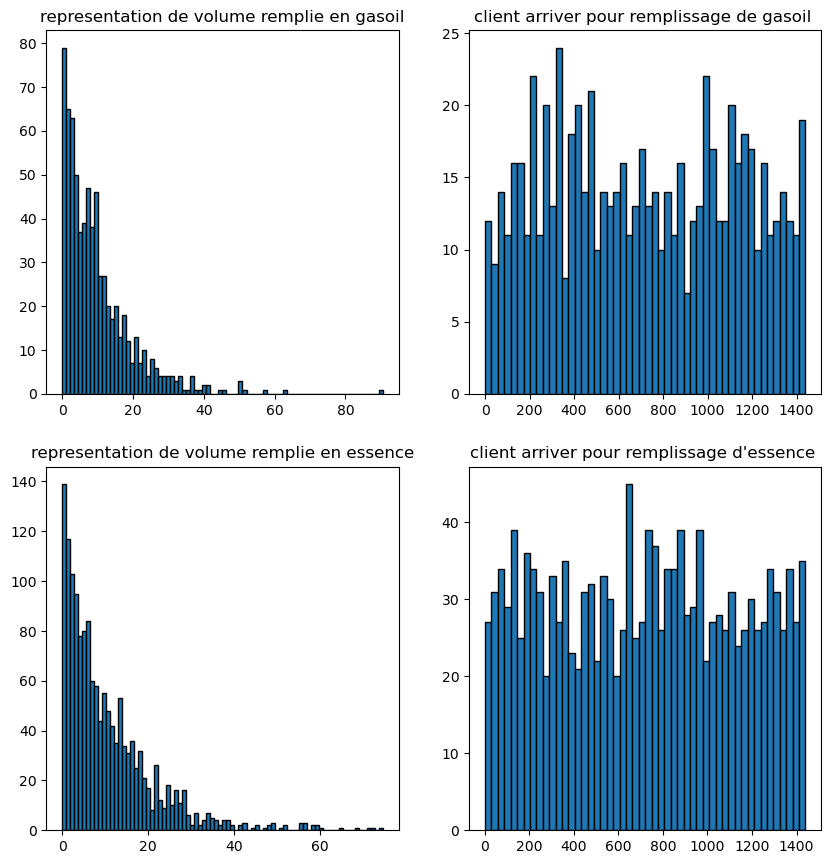

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(fuel_gasoil['remplissage'],bins=80,ec='black')
plt.title('representation de volume remplie en gasoil')
plt.subplot(2,2,2)
plt.hist(fuel_gasoil['arrivee'],bins=50,ec='black')
plt.title("client arriver pour remplissage de gasoil ")
plt.subplot(2,2,3)
plt.hist(fuel_essence['remplissage'],bins=80,ec='black')
plt.title('representation de volume remplie en essence')
plt.subplot(2,2,4)
plt.hist(fuel_essence['arrivee'],bins=50,ec='black')
plt.title("client arriver pour remplissage d'essence ")
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)



plt.show()




On remarque que les deux suivent une distribution exponotielle pour le remplissage et pour l'arrivee la loi de poisson 




In [18]:
gasoil_cumul=0 ##compteur pour gasoil remplit
ess_cumul=0 ##compteur pour l'essence remplit
gasoil_df=pd.DataFrame()
ess_df = pd.DataFrame()
i=1 #represente le compteur pour les jour 
r=1
### connaitre le temps necessaire pour que le reservoire sois vider 
while ess_cumul<50000:  #### tanque notre cumul n'a pas attens 50000 litre
   
   df=pd.DataFrame()
    
   df["arrivee"]=simulation_poisson(mean_client_ess,1440)##genere une liste de donnees d'arriver avec la loi de poisson
   df['remplissage']=simulation_exp(len(df["arrivee"]),mean_ess)##genere une liste de donnees de remplissage
   df['jour']=np.full((len(df['arrivee']),1),i)##jour pour garder la trace 
   df['service']=np.full((len(df['arrivee']),1),'essence')### on peut s'en 
   i+=1
   ess_df=pd.concat([df,ess_df])
   
   ess_cumul=ess_df['remplissage'].sum()
    
    
while gasoil_cumul<50000:
   
   df=pd.DataFrame()
    
   df["arrivee"]=simulation_poisson(mean_client_gasoil,1440)
   df['remplissage']=simulation_exp(len(df["arrivee"]),mean_gasoil)
   df['jour']=np.full((len(df['arrivee']),1),r)
   df['service']=np.full((len(df['arrivee']),1),'gasoil')
   r+=1
   gasoil_df=pd.concat([df,gasoil_df])
   
   gasoil_cumul=gasoil_df['remplissage'].sum()
   

dans la cellule précédente on a mis deux boucles while qui font le même travaille une pour le dataset essence et l'autre pour le dataset du gasoil 
on va simuler des données remplir le dataset jusqu'à obtenir un cumul plus de 50000 pour sortir de la boucle 

<br>

pour finir et voir les valuers a utilisé la fonction max pour avoir le jour ou le réservoir c'est vider.

In [19]:
print("le nombre de jour pour que le reservoire d'esscence se vide ",ess_df['jour'].max(),'\nle nombre de jour pour que le reservoire de gasoil se vide',gasoil_df['jour'].max())


le nombre de jour pour que le reservoire d'esscence se vide  2 
le nombre de jour pour que le reservoire de gasoil se vide 3
